# Promedios ponderados
En este módulo veremos la idea de promedio ponderado en el que ciertas muestras reciben más peso que otras.

Realizar un promedio ponderado deslizante es una *convolución encubierta*. Veremos cómo calcular la respuesta impulsional.

Una vez tengamos la respuesta impulsional, dejaremos de hacer bucles con np.mean() para utilizar np.convolve y observaremos la diferencia de rapidez de los cálculos.

Concluiremos diciendo que con otros pesos, es posible hacer *otras cosas*, por ejemplo derivar y cosas como quedarse con ciertas frecuencias y eliminar otras.



In [2]:
%matplotlib inline
import numpy as np
from scipy import signal
import upv_audio
import matplotlib
import matplotlib.pyplot as plt
import math
import warnings; warnings.simplefilter('ignore') # Para quitar mensajes de warning
_=np.set_printoptions(precision=2)

import UPVlog

nombre_cuaderno='04-Promedios Ponderados'
import importlib

mylogger = UPVlog.UPVlog(nombre_cuaderno)

## Promedio ponderado
La ponderación es una medida de la importancia que le damos a un elemento a la hora de hacer la media.

In [3]:
# Comenzaremos con un caso sencillo de cálculo de la media
x=np.array([3, 2, 7])
media=np.mean(x)
print('x=',x,' media_sin_ponderar=',media)

x= [3 2 7]  media_sin_ponderar= 4.0


In [4]:
# Ahora definiremos un vector de pesos inicialmente todos iguales y calcularemos la media como 
# producto escalar (suma de productos) dividido por suma de pesos. 
# Esto es equivalente a lo anterior.
pesos=np.array([1,1,1])
media=np.dot(pesos,x)/np.sum(pesos)
print('x=',x,' pesos=', pesos, ' media=',media)

x= [3 2 7]  pesos= [1 1 1]  media= 4.0


In [5]:
# Ahora daremos un peso mayor al valor central y volveremos a calcular la media
pesos=np.array([1,3,1])
media=np.dot(pesos,x)/np.sum(pesos)
print('x=',x,' pesos=', pesos, ' media=',media)

x= [3 2 7]  pesos= [1 3 1]  media= 3.2


Vemos que respecto a la no ponderación (o ponderación uniforme), el valor de la media "se acerca" al valor "2". En realidad, dando un peso de "3" es equivalente a que de esa cantidad hubiéramos tenido 3 valores:

In [6]:
print(np.mean(np.array([3,2,2,2,7])))

3.2


________________________________

A continuación calcule la media ponderada de unos datos *z* con unos ciertos pesos *pesosz*:

In [7]:
# EJERCICIO EVALUABLE

# Dados unos valores y unos pesos
z=np.array([5,1,6,9,4])
pesosz=np.array([1,1,3,2,1])

# Calcular la media ponderada
media_ponderada_z=None
### BEGIN SOLUTION
media_ponderada_z=np.dot(z,pesosz)/np.sum(pesosz)
### END SOLUTION
print(media_ponderada_z)
                

5.75


In [8]:
# Comprobación por el estudiante
# Antes de continuar ejecute para comprobar que no hay errores.
# Si hay errores revise celda anterior

mylogger.log("Testing media ponderada")
### BEGIN TESTS
assert media_ponderada_z is not None, "media_ponderada_z no ha sido rellenada"
assert media_ponderada_z > 5.5 and media_ponderada_z < 6 ,"El valor de media_ponderada_z no es correcto"
### END TESTS

# Existen tests ocultos que comprueban el valor con 2 decimales 
### BEGIN HIDDEN TESTS
assert media_ponderada_z is not None, "media_ponderada_z no ha sido rellenada"
assert abs(media_ponderada_z -5.75)<1e-3 ,"El valor de media_ponderada_z no es correcto"
### END HIDDEN TESTS
mylogger.log("Success Testing media ponderada")

____________________________

A continuación, determinar un vector *v* de modo que cuando se calcule la media de dicho vector usando *np.mean(v)* el resultado sea el mismo que si se calcula la media ponderada de z como en el apartado anterior

In [8]:
# Determinar el valor de v para que al calcular np.mean(v) se obtenga media_ponderada_z
# v será un array de numpy v=np.array([...])

v=None
z=np.array([5,1,6,9,4])
pesosz=np.array([1,1,3,2,1])

### BEGIN SOLUTION
v=np.array([5,1,6,6,6,9,9,4])
### END SOLUTION

print(len(v))
print(np.mean(v))


8
5.75


In [9]:
# Esta celda sirve para que sepa si ha hecho bien la celda anterior
# Puede probar a ejectutarla tantas veces como quiera hasta que no tenga errores

mylogger.log("Testing promedios ponderados 2")
### BEGIN TESTS
assert v is not None, "v no se ha rellenado"
assert len(v) == 8, "El tamaño de v no es correcto"
assert np.mean(v) > 5.6 and np.mean(v) < 5.9, "Los valores de v no son correctos"
### END TESTS

### BEGIN HIDDEN TESTS

assert np.mean(v) > 5.6 and np.mean(v) < 5.9, "Los valores de v no son correctos"

vs=np.sort(v)
vss=np.sort(np.array([5,1,6,6,6,9,9,4]))
assert np.max(np.abs(vs-vss))< 1e-4, "Los valores de v no son correctos"
### END HIDDEN TESTS

mylogger.log("Sucess Testing promedios ponderados 2")

In [10]:
# Celda para corrección automática
### BEGIN HIDDEN TESTS
assert v is not None, "v no se ha rellenado"
assert len(v) == 8, "El tamaño de v no es correcto"

assert np.mean(v) > 5.6 and np.mean(v) < 5.9, "Los valores de v no son correctos"

vs=np.sort(v)
vss=np.sort(np.array([5,1,6,6,6,9,9,4]))
assert np.max(np.abs(vs-vss))< 1e-4, "Los valores de v no son correctos"
### END HIDDEN TESTS

__________________________________________________________

### Pesos muy grandes

* Si le damos un peso muy grande a uno de los valores y muy pequeño (en proporción) al resto , al final la media se parece mucho a dicho valor. Es como "promediar menos"

* Si le damos un peso muy pequeño a uno de los valores respecto al resto, dicho valor apenas influye en la media

In [11]:
#Si le damos un peso muy grande a uno de los valores y muy pequeño (en proporción) a los otros, 
# al final la media se parece mucho a dicho valor. Es como "promediar menos"
pesos=np.array([1,100,1])
media=np.dot(pesos,x)/np.sum(pesos)
print('x=',x,' pesos=', pesos, ' media=',media)

x= [3 2 7]  pesos= [  1 100   1]  media= 2.0588235294117645


### Pesos normalizados
 En vez de hacer el producto escalar por pesos y luego dividir por la suma de los pesos, es posible calcular unos **pesos normalizados**, 
 $pesos\_n= pesos /\sum pesos$ y hacer el producto escalar por ellos sin dividir posteriormente:

In [12]:
# Normalizamos los pesos para que tengan suma 1

pesos_normalizados = None 

### BEGIN SOLUTION
pesos_normalizados=pesos/np.sum(pesos)
### END SOLUTION

# Calculamos la media ponerada como el producto escalar:
media_ponderada=np.dot(pesos_normalizados,x)

print('x=',x,' pesos_normalizados=', pesos_normalizados, ' media_ponderada=',media_ponderada)

x= [3 2 7]  pesos_normalizados= [0.01 0.98 0.01]  media_ponderada= 2.0588235294117645


In [13]:
# Celda para comprobación
mylogger.log("Testing pesos normalizados")
### BEGIN TESTS
assert pesos_normalizados is not None,"pesos_normalizados no rellenados"
assert len (pesos_normalizados)== len(pesos), "pesos_normalizados incorrectos"
assert abs(np.sum(pesos_normalizados)-1) < 1e-5, "pesos_normalizados incorrectos"
### END TESTS
mylogger.log("Success Testing pesos normalizados")

________________________________________________________________

## Medias ponderadas deslizantes
La idea de ponderar al promediar permite dar más importancia a unas muestras que a otras.
Normalmente las ponderaciones que se emplean son:
* Uniforme: equivalente a no ponderar al promediar. Es como ponderar con pesos=\[1 1 1 1\]
* Centradas: dan más peso a las muestras cercanas al centro del intervalo promediado, ejemplo:pesos= \[1,2,4,2,1\]. Los promediados gaussianos ampliamente utilizados en análisis de imagen son un ejemplo.
* Ponderando más lo más reciente. En este caso se da más peso a las últimas muestras de cada intervalo analizado. Ejemplo: pesos= \[1,2,3,4,5\]

### Comparación entre promediado con ponderación y sin ponderación
Vamos a coger un fragmento de una señal de audio y vamos a comparar el resultado de realizar un promediado con ponderación y sin ponderación. Vamos a coger dos tipos de ponderación:
* Una primera más razonable que podría ser una ponderación triangular.
* Una segunda en la que la muestra central tenga un peso enorme respecto al resto. Este caso tendrá poco interés en la práctica, pero pretende ilustrar el hecho de que con esta ponderación se puede decir que "casi no se promedia"

Concluiremos que cuánto más uniforme es la ponderación, más se suaviza la señal para un mismo tamaño de promediado.

In [14]:
fs,rigo=upv_audio.read('audios/rigoletto.wav')
rigomono=np.mean(rigo,axis=1)
print(rigomono.shape)

(354232,)


In [15]:
def promDeslizantePonderadoMono(x,pesos_normalizados):
    '''
    x: muestras de entrada. Señal mono
    pesos_normalizados: pesos para ponderar normalizados
    '''
    assert x.ndim ==1 , 'Solo señales mono'

    medias=[] # lista vacia
    blcksize=len(pesos_normalizados)
    
    n1=0
    n2=n1+blcksize   
    while n2 <= len(x):
        muestras=x[n1:n2]
        media_ponderada=None
        ### BEGIN SOLUTION
        media_ponderada=np.dot(muestras,pesos_normalizados)
        ### END SOLUTION        
        n1 += 1
        n2 += 1
        medias.append(media_ponderada)
    #Convertir de lista Python a numpy-array
    
    return np.array(medias)

In [16]:
blcksize=15

# Pesos todos iguales
pesos0=np.ones(15)

# Pesos mayores en el centro
pesos1=signal.windows.triang(blcksize)

# Un peso mucho mayor que el resto
pesos2=np.ones_like(pesos1)
mitad=int( (blcksize-1)/2)
pesos2[mitad]=100

print ("pesos 0=",pesos0)
print ("pesos 1=",pesos1)
print ("pesos 2=",pesos2)

pesos 0= [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
pesos 1= [0.12 0.25 0.38 0.5  0.62 0.75 0.88 1.   0.88 0.75 0.62 0.5  0.38 0.25
 0.12]
pesos 2= [  1.   1.   1.   1.   1.   1.   1. 100.   1.   1.   1.   1.   1.   1.
   1.]


In [17]:
# Normalizaremos ambos pesos para que tengan suma==1
pesos0=pesos0/np.sum(pesos0)
pesos1=pesos1/np.sum(pesos1)
pesos2=pesos2/np.sum(pesos2)
# Imprimimos los pesos normalizados
print(pesos0)
print(pesos1)
print(pesos2)

[0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
 0.07]
[0.02 0.03 0.05 0.06 0.08 0.09 0.11 0.12 0.11 0.09 0.08 0.06 0.05 0.03
 0.02]
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.88 0.01 0.01 0.01 0.01 0.01 0.01
 0.01]


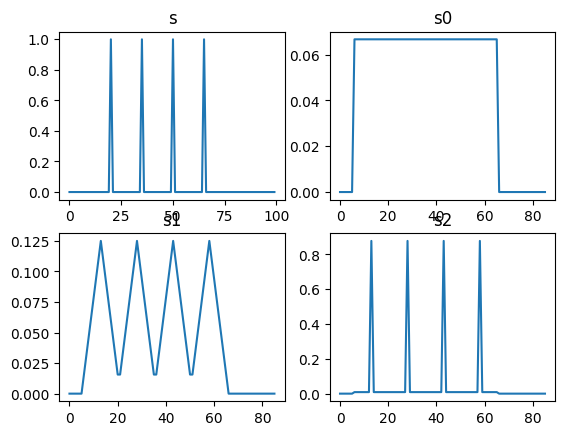

In [18]:
# Comprobación por el alumno de que promDeslizantePonderadoMono() está bien
# Ejecutar y comprobar que las gráficas coinciden con las de la celda siguiente
# PRESTAR ATENCION a amplitudes, duraciones etc. 
# En caso de discrepancia corregir funcion
mylogger.log("Testing promDeslizantePonderadoMono()")
### BEGIN TESTS
s=np.zeros(100)
s[20:80:15]=1

s0=promDeslizantePonderadoMono(s,pesos0)
assert s0 is not None
assert len(s0) >0 

s1=promDeslizantePonderadoMono(s,pesos1)
s2=promDeslizantePonderadoMono(s,pesos2)

_=plt.subplot(2,2,1)
_=plt.plot(s)
_=plt.title("s")

_=plt.subplot(2,2,3)
_=plt.plot(s1)
_=plt.title("s1")

_=plt.subplot(2,2,4)
_=plt.plot(s2)
_=plt.title("s2")

_=plt.subplot(2,2,2)
_=plt.plot(s0)
_=plt.title("s0")
### END TESTS


# Existen comprobaciones adicionales ocultas para comprobar la función

### BEGIN HIDDEN TESTS
np.random.seed(11)
xxx=np.random.randn(100)
hhh=np.array([1,2,3,4,5,6])
hhh=hhh/np.sum(hhh)
# HASHED AUTOTEST promDeslizantePonderadoMono(xxx,hhh)
### END HIDDEN TESTS

mylogger.log("Success Testing promDeslizantePonderadoMono()")

Las gráficas obtenidas deben ser como esto:


<center>
<img title="prom_ponderados" alt="prom_ponderados" src="images/proponderados.png" width=500  align="center">
</center>


In [19]:
# Comprobación con señal audio
mylogger.log("Probando promDeslizantePonderadoMono con señal audio")
promedio_uniforme=promDeslizantePonderadoMono(rigomono,pesos0)
promedio_triang=promDeslizantePonderadoMono(rigomono,pesos1)
promedio_central=promDeslizantePonderadoMono(rigomono,pesos2)

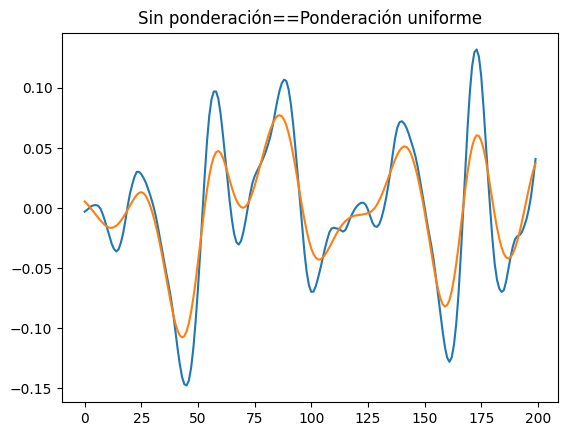

In [20]:
_=plt.plot(rigomono[100000:100200])
_=plt.plot(promedio_uniforme[99993:100193])
_=plt.title('Sin ponderación==Ponderación uniforme')

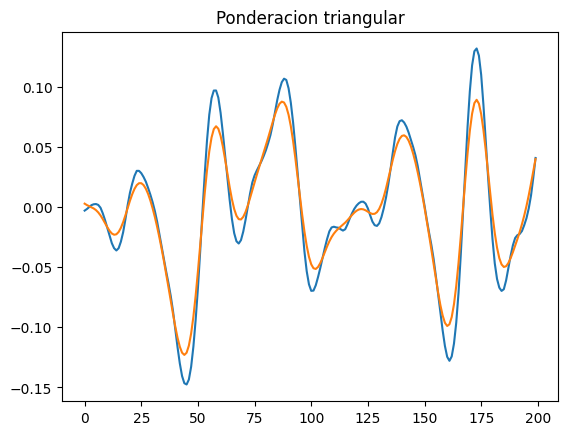

In [21]:
_=plt.plot(rigomono[100000:100200])
_=plt.plot(promedio_triang[99993:100193])
_=plt.title('Ponderacion triangular')

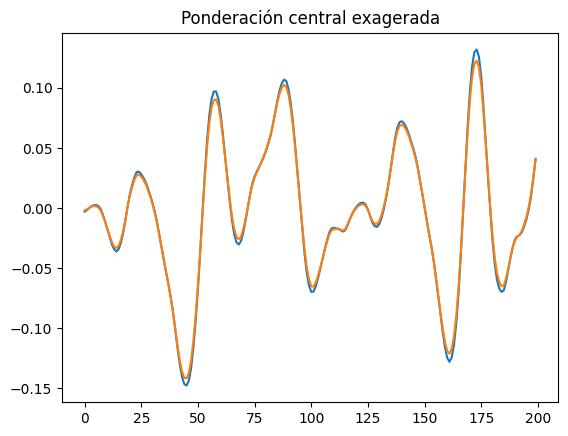

In [22]:
_=plt.plot(rigomono[100000:100200])
_=plt.plot(promedio_central[99993:100193])
_=plt.title('Ponderación central exagerada')

-----------

### Para completar de forma autónoma
Extender la función *promDeslizantePonderadoMono()* para que pueda funcionar tanto con señales stereo como mono.

In [23]:
# Ampliar la función para que permita señales stereo o mono
mylogger.log("Programando promDeslizantePonderado mono/stereo")

def promDeslizantePonderado(x,pesos_normalizados):
    '''
    x: muestras de entrada. Señal que puede ser mono o stereo
    pesos_normalizados: pesos para ponderar normalizados. Son un vector de shape (blcksize,)
    '''
    medias=[] # lista vacia
    blcksize=len(pesos_normalizados)
    
    n1=0
    n2=n1+blcksize   
    while n2 <= len(x):
        ### BEGIN SOLUTION
        if x.ndim ==2:
            muestras=x[n1:n2,:]
            kk=[]
            for s in range (x.shape[1]):
                kk.append(np.dot(muestras[:,s],pesos_normalizados))
            media_ponderada=np.array(kk)
        else:
            muestras=x[n1:n2]     
            media_ponderada=np.dot(muestras,pesos_normalizados)
        
        ### END SOLUTION        
        n1 += 1
        n2 += 1
        medias.append(media_ponderada)
    #Convertir de lista Python a numpy-array
    
    return np.array(medias)

In [25]:
### Celda para corrección automática Ejecute para ver que no hay errores
mylogger.log("Testing promDeslizantePonderado")
### BEGIN TESTS
kk=promDeslizantePonderado(np.random.randn(300,2),np.linspace(0.1,1,14))
assert kk.shape[1] ==2, "promDeslizantePonderado incorrecto"
assert kk.shape[0] == 300 -13 , "promDeslizantePonderado incorrecto"
### END TESTS
### BEGIN HIDDEN TESTS
np.random.seed(5)
stereo=np.random.randn(300,2)
hh=np.linspace(0.1,1,15)
hh=hh/np.sum(hh)

### HASHED AUTOTEST promDeslizantePonderado(stereo,hh)
### END HIDDEN TESTS

mylogger.log("Success Testing promDeslizantePonderado")

## Respuesta impulsiva
Una vez visto el efecto que introduce ponderar las muestras, vamos a aplicar el promediado ponderado a una señal muy particular, **una delta**. Al resultado lo llamaremos **respuesta impulsional**.

Analizar el efecto que produce una operación lineal e invariante sobre esta señal es clave, ya que conocida la respuesta impulsional veremos que es posible aplicar la misma operación a una seña cualquiera. En otras palabras, **la respuesta impulsional caracteriza totalmente al sistema**.


In [26]:
# Comenzaremos generando una señal "delta"
delta=np.zeros(20)
delta[10]=1
pesos=np.array([1,2,3,4,5])# Mayor peso a las muestras más recientes

In [27]:
h=promDeslizantePonderadoMono(delta,pesos)

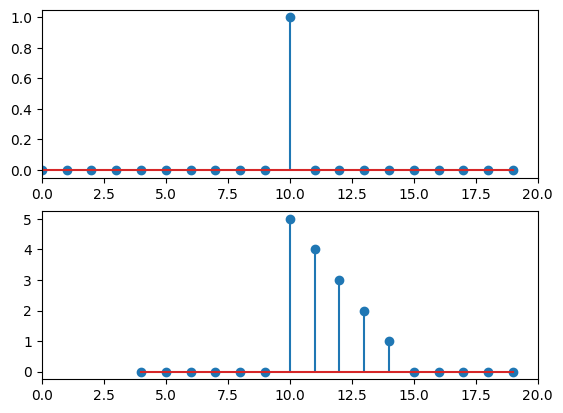

In [28]:
_=plt.subplot(2,1,1)
_=plt.stem(delta)
_=plt.xlim(0,20)
#_=plt.title('Delta')
_=plt.subplot(2,1,2)
_=plt.stem(4+np.arange(len(h)),h)
_=plt.xlim(0,20)
#_=plt.title('Promedio ponderado de delta==Respuesta impulsiva')

### Observaciones

* Lo importante es darse cuenta que **la respuesta impulsional es como los pesos dados la vuelta**

* En otras palabras, si tengo la respuesta impulsional puedo obtener los pesos simplemente invirtiendo el orden.

* Dada una señal y una respuesta impulsional, a la siguiente cadena de operaciones:
  * Darle la vuelta a la respuesta impulsional para obtener los pesos
  * Ir realizando un promediado ponderado deslizante

* ... se le llama <font size=3> **convolución de la señal "x" con la respuesta impulsiva "h"**</font>.

* Existe una función específica de python para ello muuuucho más rápida que lo que hemos hecho: np.convolve()

### Sobre retardos y transitorios 
* Hasta ahora, nuestra función de promediado solamente tomaba bloques en el que **todos los valores eran muestras de verdad**. Esto corresponde con la **opción 'valid'** de np.convolve().

Consideremos una señal *x*, de duración *len\_x*, y unos *pesos* de duración *len\_p*
![Señal y pesos](images/convo1.png)

* Para lograr que los pesos siempre tuvieran muestras debajo  limitabamos las iteraciones del bucle de manera adecuada. La opción *Valid* de la siguiente figura ilustra el rango de desplazamientos de los pesos sobre las muestras.
    * La duración de la salida vale en este caso *len\_y = len\_x - len\_p  + 1*

![Señal y pesos](images/convo2.png)

* Si se desea que la señal de salida tenga el mismo tamaño que la de entrada, en la zona de los extremos los pesos deberán multiplicar por valores no existentes en la señal que supondremos nulos. Esto corresponde con el modo *Same* de la convolución:

    * En este caso *len\_y = len\_x*
 
    * La cantidad de ceros que es necesario situar antes y después de *x* es de *(len\_p - 1) /2*

* Por último si desean calcular todos los valores de la convolución en el rango en el que algún peso tiene alguna muestra de abajo, tendremos el denominado modo *Full*. 

    * En este caso len\_y = len\_x + len\_p  - 1*
    
    * La cantidad de ceros que debo añadir por delante y por detrás a las muestras es *(len\_p - 1)*



________
## Implementación convolución discreta. Tarea autónoma
A partir del códido de promDeslizantePonderado(), implementar una función m_convolveFull() que devuelva lo mismo que np.convolve() con la opción 'full'. Las especificaciones completas son:

* Tendrá dos argumentos de entrada, x y h.

* Tendrá que invertir temporalmente h para obtener los pesos

* Tendrá que añadir la cantidad de ceros necesaria por el principio y por el final de x

* Llamará a promDeslizantePonderado(x,pesos_normalizados)

* Tendrá que probar la función con un fragmento aleatorio y demostrar que da **exactamente el mismo resultado que con np.convolve(x,h,'full')**

* La función realizada deberá funcionar tanto con señales mono como stereo

* **NO SE PUEDE EMPLEAR NP.CONVOLVE() DENTRO DE M_CONVOLVEFULL()**




In [29]:
# m_convolveFull
def m_convolveFull(x,h):
    '''
    Debe devolver lo mismo que np.convolve(x,h,'full')

    NO puede emplear np.convolve en esta función. Si lo hace la corrección automática puntuará la pregunta como incorrecta.
    '''
    pesos = None
    xp = None
    # Debe determinar los valores de pesos y xp para que la función promDeslizantePonderado(xp,pesos) devuelva lo mismo que np.convolve(...,'full')
    ### BEGIN SOLUTION
    pesos = h[::-1]

    if x.ndim==1:
        ceros=np.zeros(len(h)-1)
        xp=np.concatenate((ceros,x,ceros))
    else:
        ceros=np.zeros((len(h)-1,x.shape[1]))
        xp=np.concatenate((ceros,x,ceros))
        
    ### END SOLUTION
    

    return promDeslizantePonderado(xp,pesos)

In [30]:
# Celda evaluación funcionamiento señales mono
# RECUERDE: que si su función llama a np.convolve, se le puntuará como MAL
mylogger.log("Testing m_convolveFull mono")
importlib.reload(np) 
### BEGIN TESTS
xmono=np.random.randn(500)
h=np.random.rand(19)

# Solución de referencia

ymono_np = np.convolve(xmono,h,'full')
np.convolve = None

ymono = m_convolveFull(xmono,h)

assert ymono.shape == ymono_np.shape, "Error en convolveFull"
assert np.all(np.isclose(ymono,ymono_np)),"Error en convolveFull"

### END TESTS

### BEGIN HIDDEN TESTS

np.convolve = None

np.random.seed(1945)
xmono=np.random.randn(600)

h=np.random.rand(23)

### HASHED AUTOTEST m_convolveFull(xmono,h)


### END HIDDEN TESTS
mylogger.log("Success Testing m_convolveFull mono")

In [31]:
# Celda evaluación funcionamiento señales stereo
# RECUERDE: que si su función llama a np.convolve, se le puntuará como MAL
mylogger.log("Testing m_convolveFull stereo")
importlib.reload(np) 
### BEGIN TESTS
xstereo=np.random.randn(500,2)

# Solución referencia con numpy

lista_y=[]
for c in range(xstereo.shape[1]):
    lista_y.append(np.convolve(xstereo[:,c],h,'full'))
ystereo_np = np.stack(lista_y,axis=1)


np.convolve = None # Inhabilitar np.convolve
ystereo = m_convolveFull(xstereo,h)

assert ystereo.shape == ystereo_np.shape, "El tamaño de ystereo no es correcto"
assert np.all(np.isclose(ystereo,ystereo_np)),"Error en convolveFull"
### END TESTS



### BEGIN HIDDEN TESTS
np.convolve = None
np.random.seed(1947)
xstereo=np.random.randn(700,2)
h=np.random.rand(23)
### HASHED AUTOTEST m_convolveFull(xstereo,h)
### END HIDDEN TESTS

mylogger.log("Success Testing m_convolveFull stereo")